# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

--2020-10-21 06:15:14--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997750 (974K) [image/jpeg]
Saving to: ‘100zloty.jpg’

100zloty.jpg        100%[===================>] 974.37K  --.-KB/s    in 0.1s    

2020-10-21 06:15:14 (7.67 MB/s) - ‘100zloty.jpg’ saved [997750/997750]



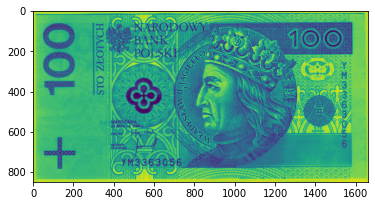

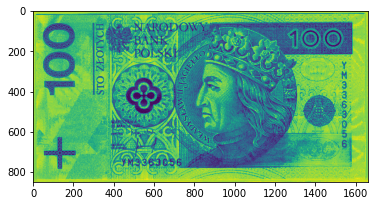

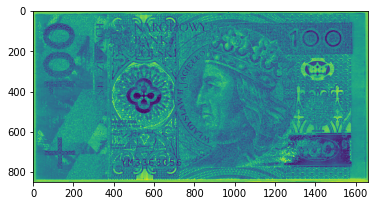

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
zloty = cv2.imread("100zloty.jpg")
zloty = cv2.cvtColor(zloty,cv2.COLOR_BGR2GRAY)

bps = []
for i in range(8):
    bps.append((zloty >> i) & 1)

orginal = ((2 ** 7) * bps[7]) + ((2 ** 6) * bps[6])
for i in range (0,6):
  orginal += (2 ** (i)) * bps[i]
plt.imshow(orginal)
plt.show()

orginal = ((2 ** 7) * bps[7])
for i in range (0,7):
  if(i==3 or i==6):
    continue
  orginal += (2 ** (i)) * bps[i]
plt.imshow(orginal)
plt.show()


orginal = ((2 ** 5) * bps[5]) + ((2 ** 2) * bps[2])
for i in range (0,7):
  if(i==2 or i==5):
    continue
  orginal += (2 ** (i)) * bps[i]
plt.imshow(orginal)
plt.show()



